In [0]:
import pandas as pd
import numpy as np

**1**

#### There are 2225 observations in total in this dataset.It has two columns, category and text. Text is the content of that observation, and category is the type of the text. There are five categories, including tech, business, sport, entertainment and politics. Sport and business categories appear most while entertainment category appears lease.

In [2]:
df=pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [0]:
group=df.groupby("category").count()
label = group.index.values.tolist()

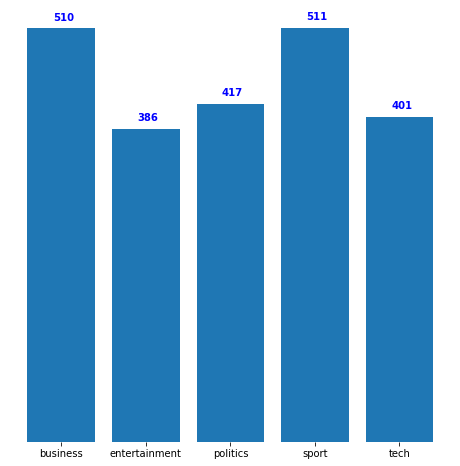

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))

y_pos = np.arange(len(label))
y_value = group.text.tolist()

plt.bar(y_pos.tolist(), y_value)
for i, v in enumerate(y_value):
    ax.text(i-0.1,v+10, str(v), color='blue', fontweight='bold')
ax.get_yaxis().set_visible(False)
plt.xticks(y_pos, label)
plt.box(False)
plt.show()

**2**

In [14]:
# Tokenize the data into one hot vectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
x = df['text']
y = df['category']
maxlen = 100  # We will cut reviews after 100 words
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x) 

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

x = pad_sequences(sequences, maxlen=maxlen)

y = np.asarray(y)

print('Shape of text tensor:', x.shape)
print('Shape of category tensor:', y.shape)

# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=12)
print('Shape of X_train', x_train.shape)
print('Shape of X_test', x_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)


Found 29726 unique tokens.
Shape of text tensor: (2225, 100)
Shape of category tensor: (2225,)
Shape of X_train (1668, 100)
Shape of X_test (557, 100)
Shape of y_train (1668,)
Shape of y_test (557,)


**3**

In [0]:
from keras import layers
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import RMSprop

Model A

In [20]:
#model A
modelA = Sequential()
modelA.add(Embedding(max_words, 32, input_length=maxlen))
modelA.add(Flatten())
modelA.add(Dense(5, activation='softmax'))

# complie model
modelA.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])
modelA.summary()

# fit model
modelA.fit(x_train, pd.get_dummies(y_train), epochs=10, batch_size=32)

#evaluate model
evaluationA=modelA.evaluate(x_test, pd.get_dummies(y_test))
print('Test loss, Test acc:', evaluationA)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 16005     
Total params: 336,005
Trainable params: 336,005
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
1668/1668 [==============================] - 0s 165us/step - loss: 1.5923 - acc: 0.2944
Epoch 2/10
1668/1668 [==============================] - 0s 132us/step - loss: 1.4061 - acc: 0.7422
Epoch 3/10
1668/1668 [==============================] - 0s 134us/step - loss: 1.0732 - acc: 0.8993
Epoch 4/10
1668/1668 [==============================] - 0s 129us/step - loss: 0.6706 - acc: 0.9718
Epoch 5/10
1668/1668 [==============================] - 0s 134us/step - loss: 0.3629 - acc: 0.9886
Epoch 6/10
1668/1668 [==============================] - 0s 133us/step - loss: 0.1808 - acc: 0.9946
Epoch 7/10
1668/1668 [==============================] - 0s 133us/step - loss: 0.0855 - acc: 0.9988
Epoch 8/10
1668/1668 [==============================] - 0s 137us/step - loss: 0.0388 - acc: 1.0000
Epoch 9/10
1668/1668 [==============================] - 0s 131us/step - loss: 0.0162 - acc: 1.0000
Epoch 10/10
557/557 [==============================] - 0s 60us/step
Test loss, Test acc: [0.326812760085135, 

Model B

In [22]:
# Model B
modelB = Sequential()
modelB.add(Embedding(max_words, 32, input_length=maxlen))
modelB.add(layers.Conv1D(64, 10, activation='relu')) 
modelB.add(layers.GlobalMaxPooling1D())
modelB.add(Dense(5, activation='softmax'))

# compile model
modelB.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])
modelB.summary()

# fit model
modelB.fit(x_train, pd.get_dummies(y_train), epochs=10, batch_size=32)

# evaluate model
evaluationB = modelB.evaluate(x_test, pd.get_dummies(y_test))
print('Test loss, Test acc:', evaluationB)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 91, 64)            20544     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 325       
Total params: 340,869
Trainable params: 340,869
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
1668/1668 [==============================] - 1s 593us/step - loss: 1.5901 - acc: 0.2710
Epoch 2/10
1668/1668 [==============================] - 1s 517us/step - loss: 1.4880 - acc: 0.4472
Epoch 3/10
1668/1668 [==============================] - 1s 512us/step - loss: 1.3007 - acc: 0.5066
Epoch 4/10
1668/1668 [==============================] - 1s 538us/step - loss: 1.0446 - acc: 0.7254
Epoch 5/10
1668/1668 [==============================] - 1s 509us/step - loss: 0.7464 - acc: 0.8795
Epoch 6/10
1668/1668 [==============================] - 1s 519us/step - loss: 0.4818 - acc: 0.9299
Epoch 7/10
1668/1668 [==============================] - 1s 515us/step - loss: 0.2869 - acc: 0.9610
Epoch 8/10
1668/1668 [==============================] - 1s 506us/step - loss: 0.1635 - acc: 0.9790
Epoch 9/10
1668/1668 [==============================] - 1s 526us/step - loss: 0.0895 - acc: 0.9934
Epoch 10/10
557/557 [==============================] - 0s 159us/step
Test loss, Test acc: [0.2939521175419621

Model C

In [24]:
# Model C
modelC = Sequential()
modelC.add(Embedding(max_words, 32, input_length=maxlen))
modelC.add(layers.LSTM(32))
modelC.add(Dense(5, activation='softmax'))

# complie model
modelC.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])
modelC.summary()

# fit model
modelC.fit(x_train, pd.get_dummies(y_train), epochs=10, batch_size=32)

# evaluate model
evaluationC = modelC.evaluate(x_test, pd.get_dummies(y_test))
print('Test loss, Test acc:', evaluationC)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 165       
Total params: 328,485
Trainable params: 328,485
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
1668/1668 [==============================] - 3s 2ms/step - loss: 1.5195 - acc: 0.3351
Epoch 2/10
1668/1668 [==============================] - 3s 2ms/step - loss: 1.1286 - acc: 0.4856
Epoch 3/10
1668/1668 [==============================] - 3s 2ms/step - loss: 0.9166 - acc: 0.6511
Epoch 4/10
1668/1668 [==============================] - 3s 2ms/step - loss: 0.8080 - acc: 0.7566
Epoch 5/10
1668/1668 [==============================] - 3s 2ms/step - loss: 0.6871 - acc: 0.8219
Epoch 6/10
1668/1668 [==============================] - 3s 2ms/step - loss: 0.5359 - acc: 0.8945
Epoch 7/10
1668/1668 [==============================] - 3s 2ms/step - loss: 0.3916 - acc: 0.9275
Epoch 8/10
1668/1668 [==============================] - 3s 2ms/step - loss: 0.2540 - acc: 0.9652
Epoch 9/10
1668/1668 [==============================] - 3s 2ms/step - loss: 0.2123 - acc: 0.9532
Epoch 10/10
557/557 [==============================] - 0s 349us/step
Test loss, Test acc: [0.6053964950451945, 0.82226210832595

Model D

In [26]:
# Model D
modelD = Sequential()
modelD.add(Embedding(max_words, 32, input_length=maxlen))
modelD.add(layers.LSTM(32, return_sequences=True))
modelD.add(layers.LSTM(32, return_sequences=True))
modelD.add(layers.LSTM(32))
modelD.add(Dense(5, activation='softmax'))

# compile model
modelD.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])
modelD.summary()

# fit model
modelD.fit(x_train, pd.get_dummies(y_train), epochs=10, batch_size=32)

# evaluate model
evaluationD = modelD.evaluate(x_test, pd.get_dummies(y_test))
print('Test loss, Test acc:', evaluationD)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 32)           320000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 32)           8320      
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 32)           8320      
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 165       
Total params: 345,125
Trainable params: 345,125
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
1668/1668 [==============================] - 8s 5ms/step - loss: 1.4441 - acc: 0.3135
Epoch 2/10
1668/1668 [==============================] - 7s 4ms/step - loss: 1.0796 - acc: 0.4712
Epoch 3/10
1668/1668 [==============================] - 7s 4ms/step - loss: 0.8597 - acc: 0.6331
Epoch 4/10
1668/1668 [==============================] - 7s 4ms/step - loss: 0.6736 - acc: 0.7332
Epoch 5/10
1668/1668 [==============================] - 7s 4ms/step - loss: 0.5530 - acc: 0.8022
Epoch 6/10
1668/1668 [==============================] - 7s 4ms/step - loss: 0.4064 - acc: 0.8627
Epoch 7/10
1668/1668 [==============================] - 7s 4ms/step - loss: 0.3013 - acc: 0.9083
Epoch 8/10
1668/1668 [==============================] - 7s 4ms/step - loss: 0.2120 - acc: 0.9305
Epoch 9/10
1668/1668 [==============================] - 7s 4ms/step - loss: 0.1586 - acc: 0.9556
Epoch 10/10
557/557 [==============================] - 1s 992us/step
Test loss, Test acc: [0.7868595275780457, 0.78456014394760

Model E

In [28]:
# Model E
modelE = Sequential()
modelE.add(Embedding(max_words, 32, input_length=maxlen))
modelE.add(layers.Bidirectional(layers.LSTM(32)))
modelE.add(Dense(5, activation='softmax'))

# compile model
modelE.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])
modelE.summary()

# fit model
modelE.fit(x_train, pd.get_dummies(y_train), epochs=10, batch_size=32)

# evaluate model
evaluationE = modelE.evaluate(x_test, pd.get_dummies(y_test))
print('Test loss, Test acc:', evaluationE) 

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 32)           320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 325       
Total params: 336,965
Trainable params: 336,965
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
1668/1668 [==============================] - 4s 3ms/step - loss: 1.5754 - acc: 0.2782
Epoch 2/10
1668/1668 [==============================] - 4s 2ms/step - loss: 1.0704 - acc: 0.5713
Epoch 3/10
1668/1668 [==============================] - 4s 2ms/step - loss: 0.6771 - acc: 0.7458
Epoch 4/10
1668/1668 [==============================] - 4s 2ms/step - loss: 0.4872 - acc: 0.8070
Epoch 5/10
1668/1668 [==============================] - 4s 2ms/step - loss: 0.3885 - acc: 0.8543
Epoch 6/10
1668/1668 [==============================] - 4s 2ms/step - loss: 0.3408 - acc: 0.8687
Epoch 7/10
1668/1668 [==============================] - 4s 2ms/step - loss: 0.3170 - acc: 0.8939
Epoch 8/10
1668/1668 [==============================] - 4s 2ms/step - loss: 0.2390 - acc: 0.9388
Epoch 9/10
1668/1668 [==============================] - 4s 2ms/step - loss: 0.1732 - acc: 0.9574
Epoch 10/10
557/557 [==============================] - 0s 591us/step
Test loss, Test acc: [0.6711077909495287, 0.84380608797073

Model F

In [30]:
# Model F
modelF = Sequential()
modelF.add(Embedding(max_words, 32, input_length=maxlen))
modelF.add(layers.Bidirectional(layers.LSTM(32, dropout=0.3, recurrent_dropout=0.3))) 
modelF.add(Dense(5, activation='softmax'))

# compile model
modelF.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])
modelF.summary()

# fit model
modelF.fit(x_train, pd.get_dummies(y_train), epochs=15, batch_size=32)

# evaluate model
evaluationF = modelF.evaluate(x_test, pd.get_dummies(y_test))
print('Test loss, Test acc:', evaluationF) 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 32)           320000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 325       
Total params: 336,965
Trainable params: 336,965
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/15
1668/1668 [==============================] - 5s 3ms/step - loss: 1.5915 - acc: 0.2608
Epoch 2/15
1668/1668 [==============================] - 4s 3ms/step - loss: 1.3750 - acc: 0.4592
Epoch 3/15
1668/1668 [==============================] - 4s 3ms/step - loss: 1.2112 - acc: 0.5240
Epoch 4/15
1668/1668 [==============================] - 4s 3ms/step - loss: 1.0911 - acc: 0.5647
Epoch 5/15
1668/1668 [==============================] - 4s 3ms/step - loss: 1.0424 - acc: 0.5863
Epoch 6/15
1668/1668 [==============================] - 4s 3ms/step - loss: 1.0371 - acc: 0.5977
Epoch 7/15
1668/1668 [==============================] - 4s 3ms/step - loss: 0.9845 - acc: 0.6427
Epoch 8/15
1668/1668 [==============================] - 4s 3ms/step - loss: 0.9073 - acc: 0.6978
Epoch 9/15
1668/1668 [==============================] - 4s 3ms/step - loss: 0.7580 - acc: 0.7584
Epoch 10/15
1668/1668 [==============================] - 4s 3ms/step - loss: 0.6339 - acc: 0.8064
Epoch 11/15
1668/1668 [======

**4**

In [46]:
d={'model': ['A','B','C','D','E','F'], 'test acc': [evaluationA[1], evaluationB[1],evaluationC[1],evaluationD[1],evaluationE[1],evaluationF[1]]}
df2=pd.DataFrame(data=d)
df2.set_index(["model"], inplace=True)
df2.sort_values(by="test acc" , ascending=False)

,test acc
model,
B,0.910233
A,0.904847
F,0.856373
E,0.843806
C,0.822262
D,0.784560


#### (1)Model B using an Embedding layer with Conv1d Layers performs the best.
#### (2)And I think I might improve the model in following ways. First, use Glove embedding matrix weights. For those words which are not in the matrix would be set to 0. Second, add layers. For now, basically what I did is to use only two hidden layers. I might increase it to 3 or 4 layers. 